## **Analisis Reservasi Penginapan dengan Machine Learning**

### - Klasifikasi Menggunakan **Decission Tree**
### - Regresi Menggunakan **Ridge**


--------------------------------------------------

## **Data Preprocessing**
--------------------------------------------------

In [114]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Dataset
df = pd.read_csv('lodging_train.csv')
df_explore = df.copy()

In [116]:
# menampilkan lima baris pertama
df.head()

,ID,lodging_type,customer_type,origin_country,num_adults,num_children,num_babies,meal_type,required_parking_spaces,total_special_requests,...,reserved_room_type_code,assigned_room_type_code,reservation_changes,deposit_type,market_segment,distribution_channel,travel_agency_id,company_id,daily_rate,reservation_canceled
0,S01239,Resort Lodging,Transient,BRA,3,0.0,0,Bed & Breakfast,1.0,1.0,...,NaN,A,1.0,NaN,Direct,Direct,A250.0,NaN,176.0,0
1,S29904,Resort Lodging,Transient,CN,2,1.0,0,Bed & Breakfast,0.0,2.0,...,D,D,0.0,No Deposit,Online TA,TA/TO,A241.0,NaN,154.5,0
2,S48475,City Lodging,Contract,PRT,2,0.0,0,Bed & Breakfast,0.0,0.0,...,A,A,0.0,NaN,Online TA,TA/TO,A9.0,NaN,126.0,0
3,S16158,Resort Lodging,Transient,GBR,2,0.0,0,Bed & Breakfast,0.0,2.0,...,A,D,0.0,No Deposit,Online TA,TA/TO,A240.0,NaN,48.0,0
4,S00481,Resort Lodging,Transient,PRT,2,0.0,0,Bed & Breakfast,0.0,1.0,...,D,D,0.0,No Deposit,Direct,NaN,NaN,NaN,173.0,0


In [117]:
# menampilkan 5 baris terakhir dari DataFrame
df.tail()

,ID,lodging_type,customer_type,origin_country,num_adults,num_children,num_babies,meal_type,required_parking_spaces,total_special_requests,...,reserved_room_type_code,assigned_room_type_code,reservation_changes,deposit_type,market_segment,distribution_channel,travel_agency_id,company_id,daily_rate,reservation_canceled
101476,S111275,City Lodging,Transient,PRT,1,0.0,0,Bed & Breakfast,0.0,0.0,...,A,D,0.0,No Deposit,Direct,Direct,NaN,NaN,70.00,0
101477,S105809,City Lodging,Contract,PRT,2,0.0,0,Bed & Breakfast,0.0,0.0,...,A,A,0.0,Non Refund,Groups,TA/TO,A1.0,NaN,62.00,1
101478,S119271,City Lodging,Transient-Party,PRT,1,0.0,0,Half board,0.0,0.0,...,A,A,1.0,No Deposit,Groups,TA/TO,A19.0,NaN,104.00,0
101479,S21341,Resort Lodging,Transient,DEU,2,0.0,0,Bed & Breakfast,0.0,1.0,...,D,E,0.0,No Deposit,Online TA,TA/TO,A240.0,NaN,143.54,0
101480,S52615,City Lodging,Transient,FRA,2,0.0,0,Undefined,0.0,1.0,...,A,A,0.0,No Deposit,Online TA,TA/TO,A9.0,NaN,86.00,0


In [118]:
# Dimensi dataframe
print(f"Dimensi dari dataframe iris adalah {df.shape}\n")
print(f"Terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom")

Dimensi dari dataframe iris adalah (101481, 28)

Terdiri dari 101481 baris dan 28 kolom


In [119]:
# Tipe data
df.dtypes

ID                                       object
lodging_type                             object
customer_type                            object
origin_country                           object
num_adults                                int64
num_children                            float64
num_babies                                int64
meal_type                                object
required_parking_spaces                 float64
total_special_requests                  float64
time_between_reservation_and_arrival      int64
waiting_list_days                       float64
arrival_date                             object
weekend_nights_stayed                     int64
week_nights_stayed                        int64
repeated_guest                          float64
previous_cancellations                  float64
previous_not_canceled_reservations      float64
reserved_room_type_code                  object
assigned_room_type_code                  object
reservation_changes                     

In [120]:
# Statistik deskriptif
df.describe()

,num_adults,num_children,num_babies,required_parking_spaces,total_special_requests,time_between_reservation_and_arrival,waiting_list_days,weekend_nights_stayed,week_nights_stayed,repeated_guest,previous_cancellations,previous_not_canceled_reservations,reservation_changes,daily_rate,reservation_canceled
count,101481.000000,101479.000000,101481.000000,98094.000000,98184.000000,101481.000000,98166.000000,101481.000000,101481.000000,98135.000000,97974.000000,98201.000000,98118.000000,101481.000000,101481.000000
mean,1.856229,0.103923,0.007824,0.062124,0.566661,104.054936,2.387008,0.928095,2.498340,0.031426,0.089575,0.133716,0.219175,101.819295,0.370414
std,0.582936,0.398860,0.098059,0.243945,0.790024,107.004105,17.872046,0.997446,1.903687,0.174467,0.858521,1.476107,0.644451,50.965788,0.482918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.090000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,94.620000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,1.000000,160.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,126.000000,1.000000
max,55.000000,10.000000,10.000000,8.000000,5.000000,737.000000,391.000000,19.000000,50.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,1.000000


In [121]:
# Ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101481 entries, 0 to 101480
Data columns (total 28 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    101481 non-null  object 
 1   lodging_type                          101481 non-null  object 
 2   customer_type                         98074 non-null   object 
 3   origin_country                        101063 non-null  object 
 4   num_adults                            101481 non-null  int64  
 5   num_children                          101479 non-null  float64
 6   num_babies                            101481 non-null  int64  
 7   meal_type                             96452 non-null   object 
 8   required_parking_spaces               98094 non-null   float64
 9   total_special_requests                98184 non-null   float64
 10  time_between_reservation_and_arrival  101481 non-null  int64  
 11  

In [122]:
# Nilai Unik
def unique_category(df):
    print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
    print('#'*70)
    print()
    for col in df.select_dtypes(include=object).columns:
        print(col, f": {len(df[col].unique())}", df[col].unique())
        print("\n")

unique_category(df)

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
######################################################################

ID : 101481 ['S01239' 'S29904' 'S48475' ... 'S119271' 'S21341' 'S52615']


lodging_type : 2 ['Resort Lodging' 'City Lodging']


customer_type : 5 ['Transient' 'Contract' 'Transient-Party' nan 'Group']


origin_country : 172 ['BRA' 'CN' 'PRT' 'GBR' 'ROU' 'ITA' 'FRA' 'BEL' 'ESP' 'DEU' 'ARE' 'USA'
 'QAT' 'FIN' 'POL' 'ISR' 'NZL' 'THA' 'NLD' 'IRL' 'TUR' 'CHN' 'AUT' 'CHE'
 nan 'SWE' 'TWN' 'SRB' 'GRC' 'AUS' 'RUS' 'ARG' 'LTU' 'IDN' 'AGO' 'IND'
 'KOR' 'JPN' 'CZE' 'NOR' 'DZA' 'LVA' 'HND' 'MEX' 'SAU' 'IRN' 'HUN' 'PER'
 'DNK' 'MAR' 'GAB' 'OMN' 'CHL' 'GEO' 'BGR' 'UMI' 'EGY' 'ALB' 'EST' 'HRV'
 'LUX' 'UKR' 'ZAF' 'COL' 'HKG' 'SGP' 'PHL' 'ASM' 'MDV' 'MLT' 'CYP' 'VEN'
 'MOZ' 'ECU' 'GIB' 'SEN' 'CUB' 'BLR' 'CIV' 'SVK' 'SVN' 'URY' 'MUS' 'PAK'
 'CRI' 'ETH' 'PLW' 'TMP' 'JOR' 'ISL' 'BOL' 'KWT' 'TUN' 'CAF' 'NGA' 'MYS'
 'PRI' 'SLV' 'AZE' 'SUR' 'ZWE' 'TJK' 'JEY' 'ZMB' 'AND'

### Drop ID dan Data Tidak Relevan

In [123]:
# Drop ID
df = df.drop('ID',axis=1)
df.head()

,lodging_type,customer_type,origin_country,num_adults,num_children,num_babies,meal_type,required_parking_spaces,total_special_requests,time_between_reservation_and_arrival,...,reserved_room_type_code,assigned_room_type_code,reservation_changes,deposit_type,market_segment,distribution_channel,travel_agency_id,company_id,daily_rate,reservation_canceled
0,Resort Lodging,Transient,BRA,3,0.0,0,Bed & Breakfast,1.0,1.0,31,...,NaN,A,1.0,NaN,Direct,Direct,A250.0,NaN,176.0,0
1,Resort Lodging,Transient,CN,2,1.0,0,Bed & Breakfast,0.0,2.0,132,...,D,D,0.0,No Deposit,Online TA,TA/TO,A241.0,NaN,154.5,0
2,City Lodging,Contract,PRT,2,0.0,0,Bed & Breakfast,0.0,0.0,0,...,A,A,0.0,NaN,Online TA,TA/TO,A9.0,NaN,126.0,0
3,Resort Lodging,Transient,GBR,2,0.0,0,Bed & Breakfast,0.0,2.0,35,...,A,D,0.0,No Deposit,Online TA,TA/TO,A240.0,NaN,48.0,0
4,Resort Lodging,Transient,PRT,2,0.0,0,Bed & Breakfast,0.0,1.0,1,...,D,D,0.0,No Deposit,Direct,NaN,NaN,NaN,173.0,0


- Jumlah nilai non null company ID terlalu sedikit yaitu sekitar 5000 an maka lebih baik didrop
- Company ID memiliki banyak nilai unik maka perlu didrop untuk menghidari overfitting

In [124]:
# Drop Company ID dan travel agency ID
df = df.drop('company_id',axis=1)
df = df.drop('travel_agency_id',axis=1)

df.head()

,lodging_type,customer_type,origin_country,num_adults,num_children,num_babies,meal_type,required_parking_spaces,total_special_requests,time_between_reservation_and_arrival,...,previous_cancellations,previous_not_canceled_reservations,reserved_room_type_code,assigned_room_type_code,reservation_changes,deposit_type,market_segment,distribution_channel,daily_rate,reservation_canceled
0,Resort Lodging,Transient,BRA,3,0.0,0,Bed & Breakfast,1.0,1.0,31,...,0.0,0.0,NaN,A,1.0,NaN,Direct,Direct,176.0,0
1,Resort Lodging,Transient,CN,2,1.0,0,Bed & Breakfast,0.0,2.0,132,...,0.0,0.0,D,D,0.0,No Deposit,Online TA,TA/TO,154.5,0
2,City Lodging,Contract,PRT,2,0.0,0,Bed & Breakfast,0.0,0.0,0,...,0.0,0.0,A,A,0.0,NaN,Online TA,TA/TO,126.0,0
3,Resort Lodging,Transient,GBR,2,0.0,0,Bed & Breakfast,0.0,2.0,35,...,0.0,0.0,A,D,0.0,No Deposit,Online TA,TA/TO,48.0,0
4,Resort Lodging,Transient,PRT,2,0.0,0,Bed & Breakfast,0.0,1.0,1,...,0.0,0.0,D,D,0.0,No Deposit,Direct,NaN,173.0,0


### Cek & Penanganan Data Duplikat

In [125]:
# cek data duplikat
df.duplicated().sum()

26252

In [126]:
# Drop data duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

Sudah tidak ada data duplikat

### Cek & Penangana Nilai Null

In [127]:
def cek_null(df):
    column_index = pd.DataFrame(list(df.isnull().sum().sort_values(ascending=False).keys()), columns=['Column'])
    col_na = pd.DataFrame(list(df.isnull().sum().sort_values(ascending=False)), columns=['Total Missing'])
    percent = pd.DataFrame(list(df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100), columns=['Missing Percentage'])

    missing_data = pd.concat([column_index, col_na, percent], axis=1)
    missing_data = missing_data.set_index('Column')
    return missing_data

In [128]:
# Cek nilai null
cek_null(df)

,Total Missing,Missing Percentage
Column,,
meal_type,4094,5.442050
previous_cancellations,3507,4.661766
distribution_channel,3484,4.631193
customer_type,3407,4.528839
market_segment,3391,4.507570
required_parking_spaces,3387,4.502253
reservation_changes,3363,4.470351
repeated_guest,3346,4.447753
assigned_room_type_code,3329,4.425155


In [129]:
def show_data_distribution(df):
    print("Menampilkan informasi distribusi dataset")
    print('#'*50)
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    for col in df.select_dtypes(include=numerics):
        plt.figure(figsize=(3,3))
        sns.histplot(df[col])
        plt.show()
    print('#'*50)
    print("Menampilkan distribusi data kategorikal")
    for col in df.select_dtypes(include=object).columns:
        plt.figure(figsize=(4,3))
        sns.countplot(y=df[col])
        plt.show()

Menampilkan informasi distribusi dataset
##################################################
##################################################
Menampilkan distribusi data numerik


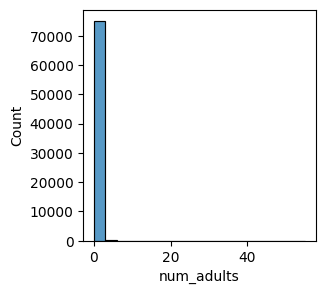

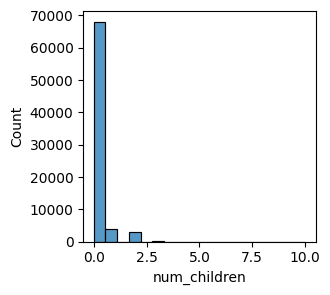

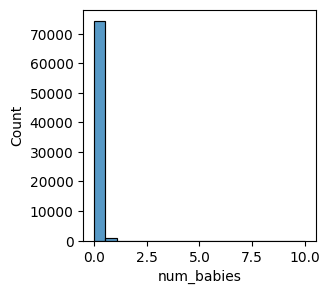

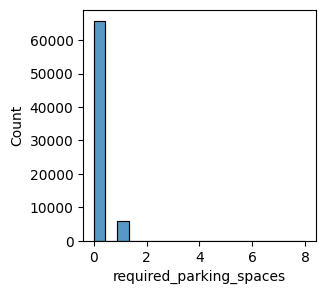

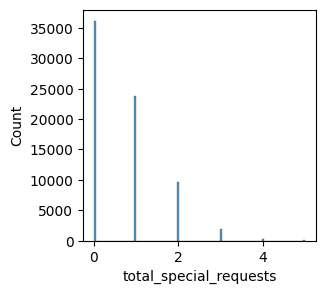

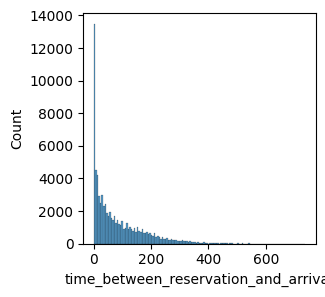

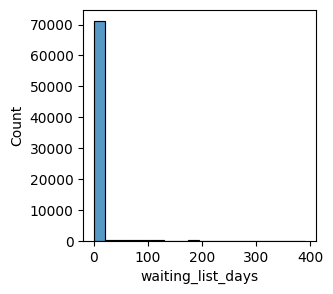

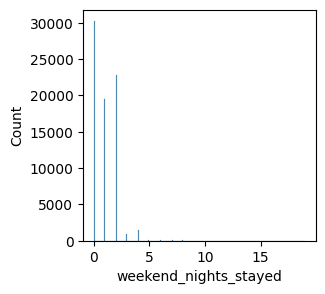

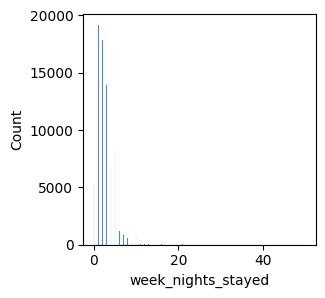

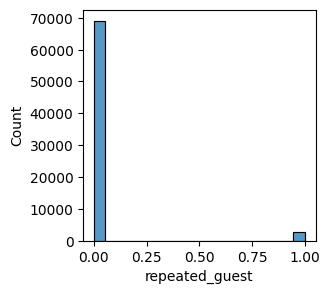

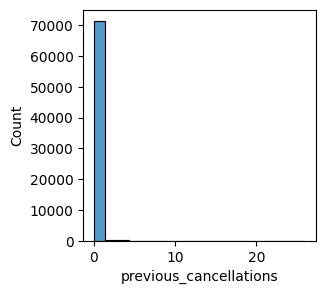

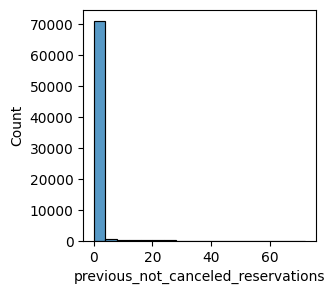

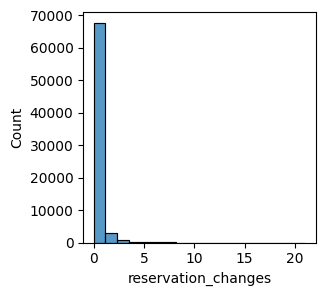

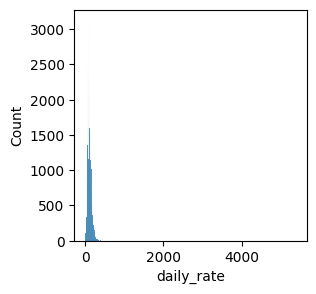

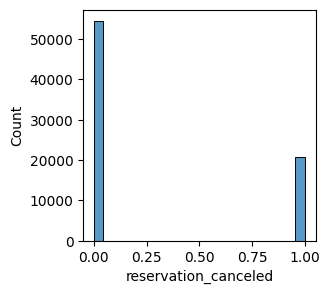

##################################################
Menampilkan distribusi data kategorikal


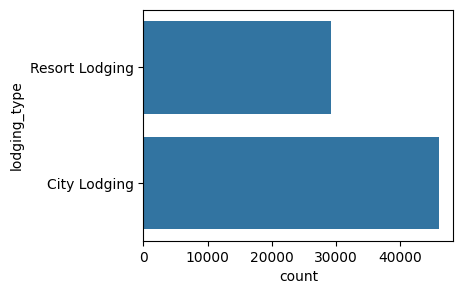

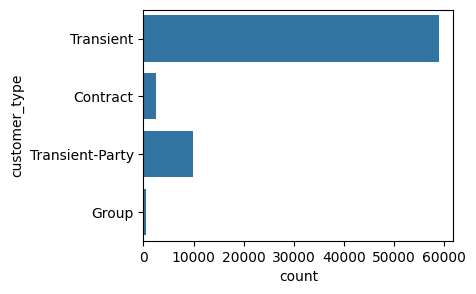

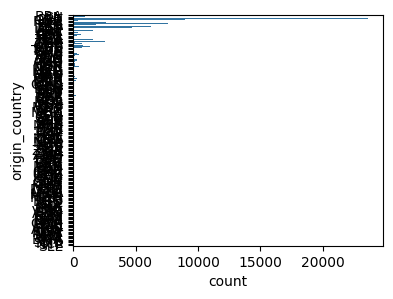

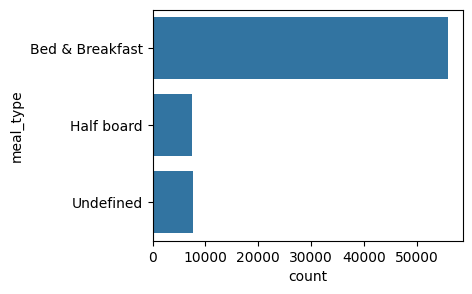

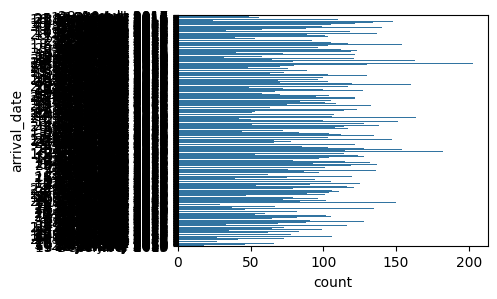

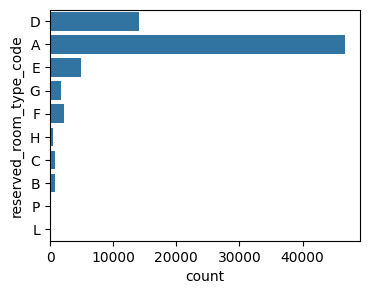

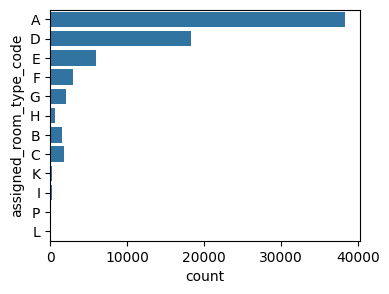

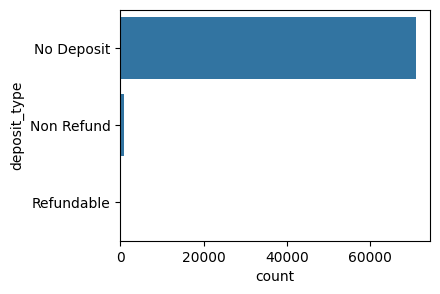

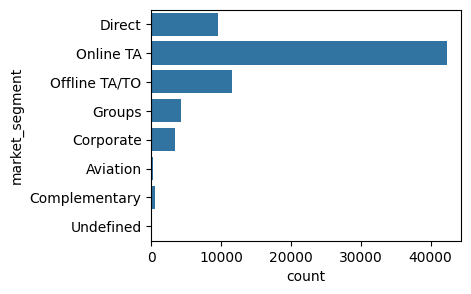

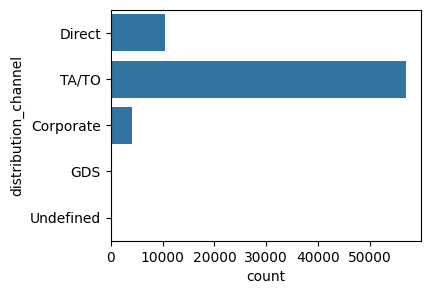

In [130]:
# Lihat persebaran data
show_data_distribution(df)

- data dengan distribusi normal diisi dengan mean
- data dengan distribusi skewed diisi dengan median
- data kategorikal dengan mode

In [131]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [132]:
# Menangani nilai null
df['meal_type'] = fill_null_mode(df['meal_type'])
df['previous_cancellations'] = fill_null_median(df['previous_cancellations'])
df['distribution_channel'] = fill_null_mode(df['distribution_channel'])
df['customer_type'] = fill_null_mode(df['customer_type'])
df['market_segment'] = fill_null_mode(df['market_segment'])
df['required_parking_spaces'] = fill_null_median(df['required_parking_spaces'])
df['reservation_changes'] = fill_null_median(df['reservation_changes'])
df['repeated_guest'] = fill_null_median(df['repeated_guest'])
df['assigned_room_type_code'] = fill_null_mode(df['assigned_room_type_code'])
df['reserved_room_type_code'] = fill_null_mode(df['reserved_room_type_code'])
df['waiting_list_days'] = fill_null_median(df['waiting_list_days'])
df['deposit_type'] = fill_null_mode(df['deposit_type'])
df['total_special_requests'] = fill_null_median(df['total_special_requests'])
df['previous_not_canceled_reservations'] = fill_null_median(df['previous_not_canceled_reservations'])
df['origin_country'] = fill_null_mode(df['origin_country'])
df['num_children'] = fill_null_median(df['num_children'])

In [133]:
# Cek null terbaru
cek_null(df)

,Total Missing,Missing Percentage
Column,,
lodging_type,0,0.0
week_nights_stayed,0,0.0
daily_rate,0,0.0
distribution_channel,0,0.0
market_segment,0,0.0
deposit_type,0,0.0
reservation_changes,0,0.0
assigned_room_type_code,0,0.0
reserved_room_type_code,0,0.0


Sudah tidak ada nilai null

### Cek dan Penanganan Outlier

In [135]:
# Memisahkan kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Deteksi dan penanganan outlier menggunakan IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outliers.sum()


num_adults                              19683
num_children                             7120
num_babies                                763
required_parking_spaces                  5989
total_special_requests                   2173
time_between_reservation_and_arrival     2124
waiting_list_days                         753
weekend_nights_stayed                     180
week_nights_stayed                       1287
repeated_guest                           2772
previous_cancellations                   1414
previous_not_canceled_reservations       2854
reservation_changes                     13052
daily_rate                               2146
reservation_canceled                        0
dtype: int64

Terdapat cukup banyak outliers, tentu angka tersebut cukup besar disandingkan dengan dimensi data yang telah diperoleh sebelumnya. Maka dari itu, penghapusan outlier tentu bukan sollusi yang tepat. 

<Axes: >

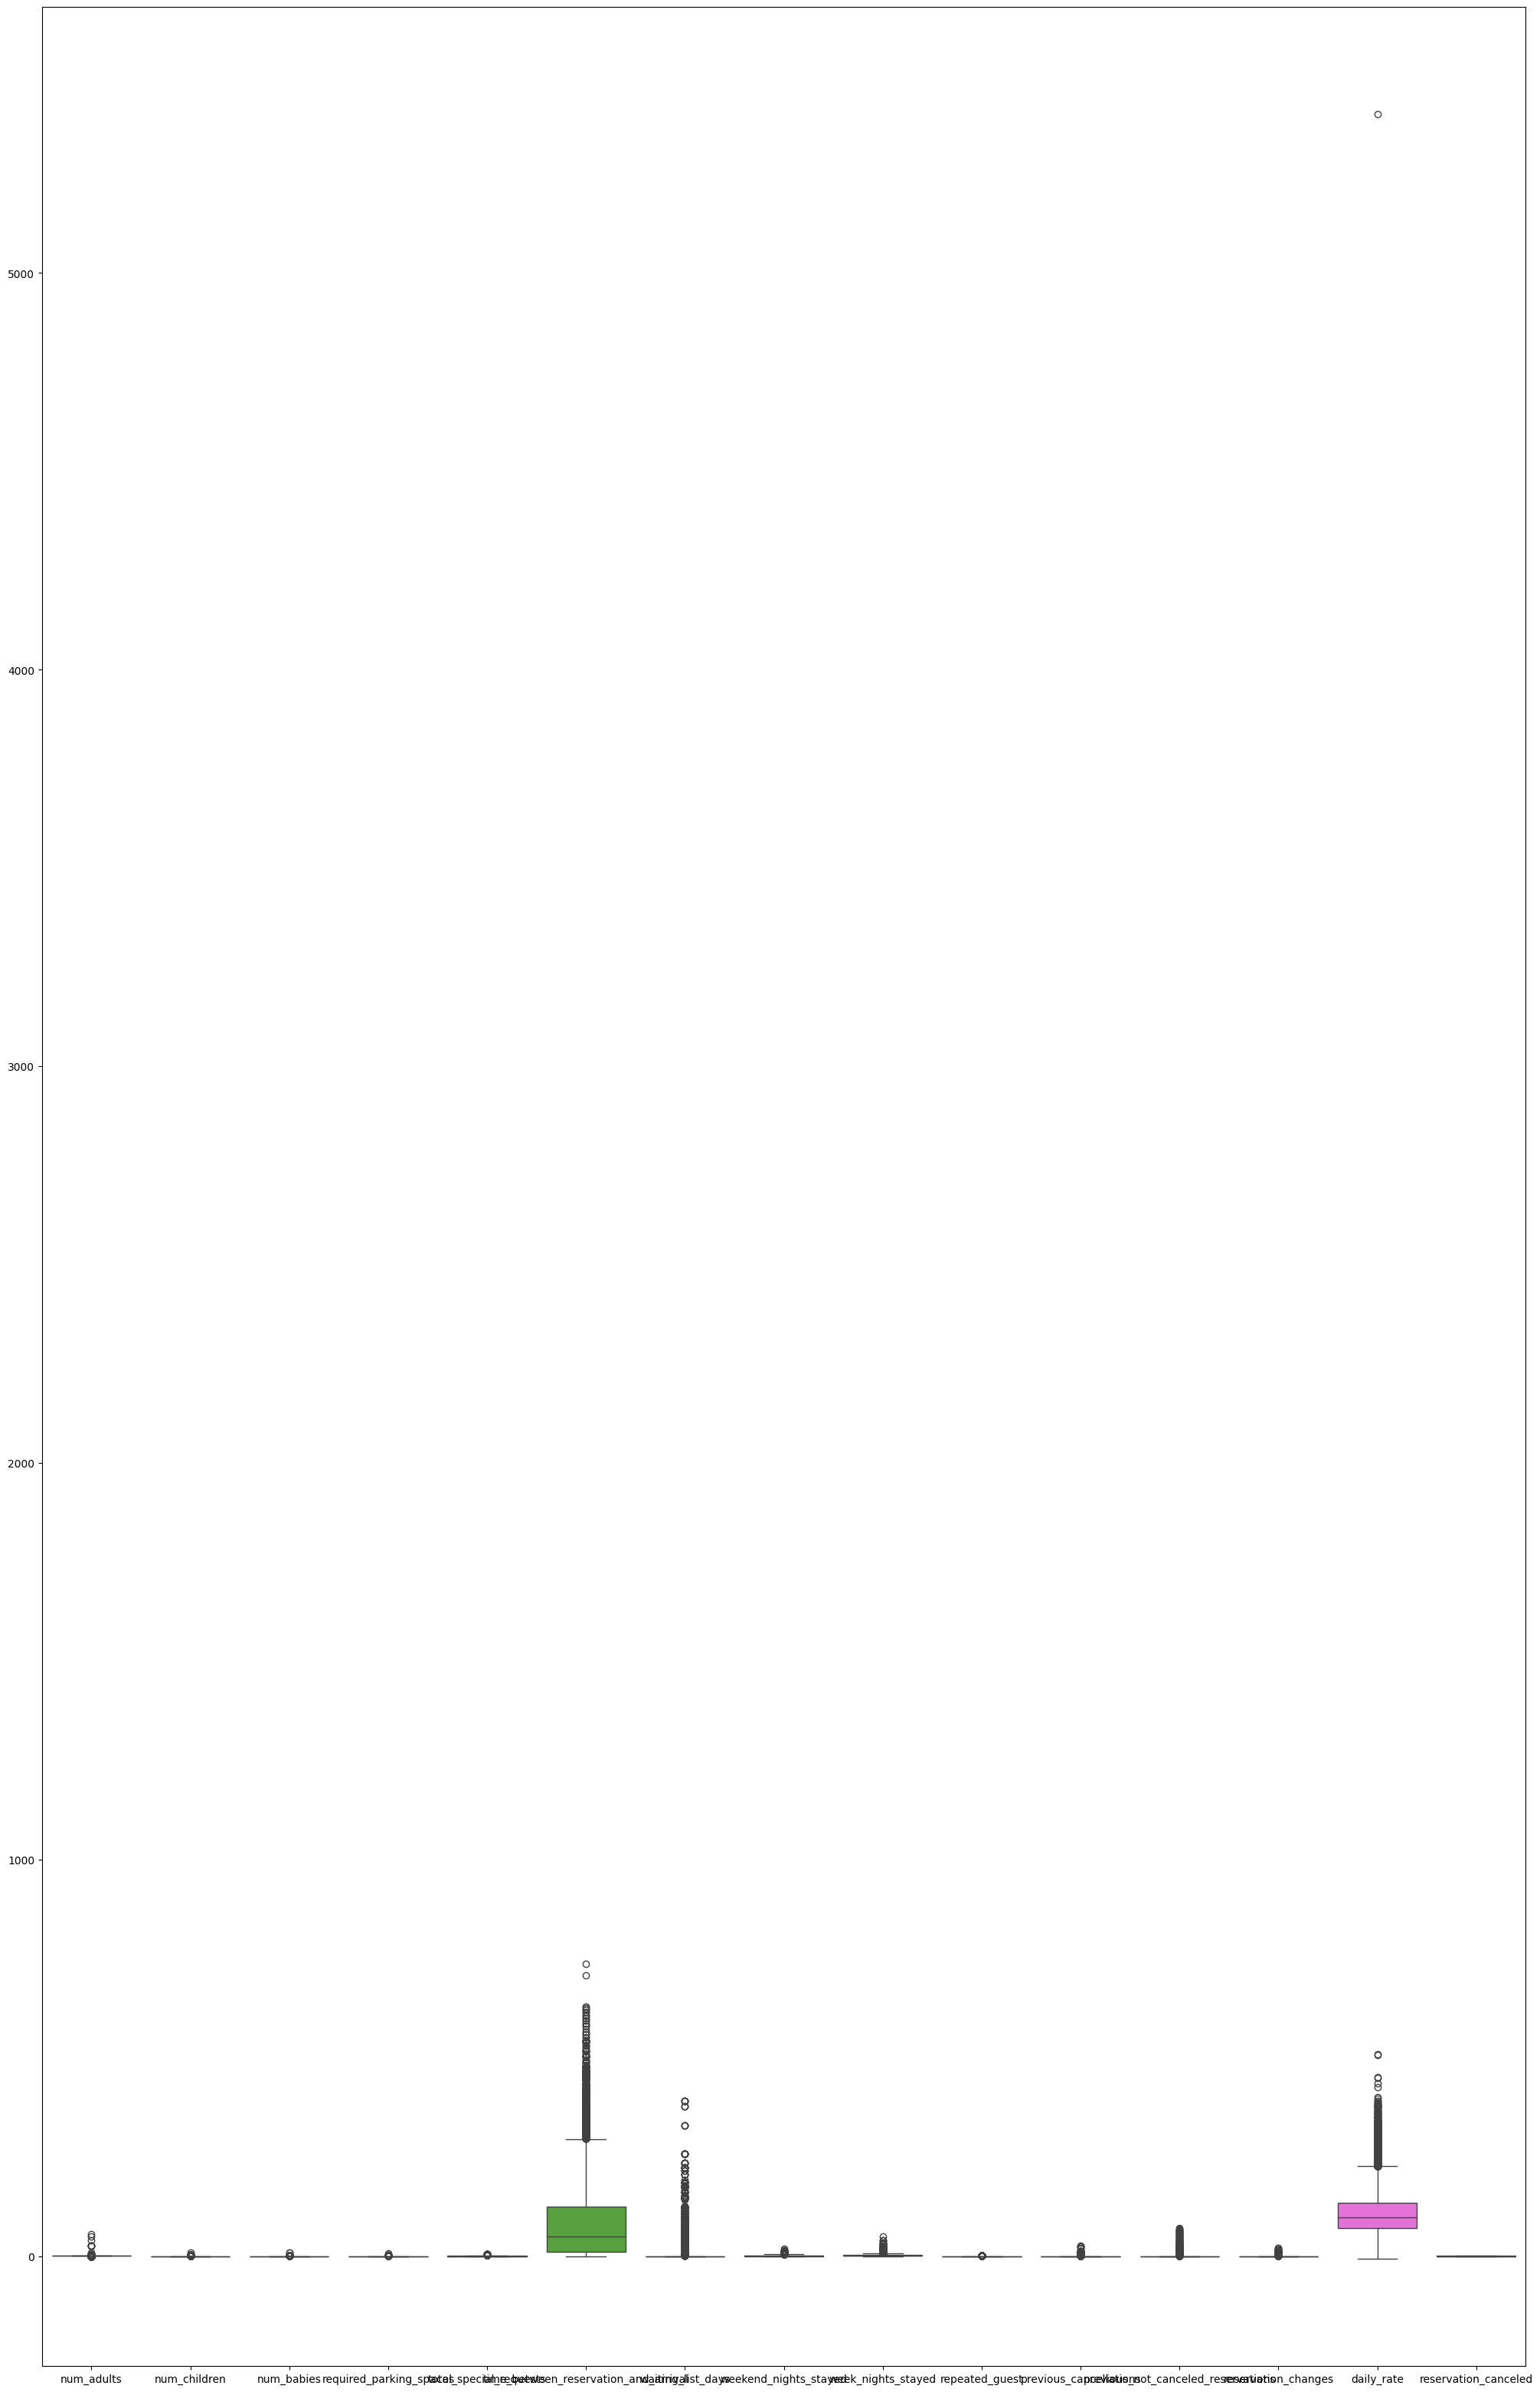

In [136]:
# Melihat outlier
plt.figure(figsize=(25, 40))
sns.boxplot(data=df)

In [137]:
# Winsorizing
def winsorize_series(s, limits):
    lower_limit = np.percentile(s, limits[0])
    upper_limit = np.percentile(s, 100 - limits[1])
    return np.clip(s, lower_limit, upper_limit)

limits = [5, 5] 
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = winsorize_series(df[col], limits)

In [138]:
# Cek kembali outliers
# Memisahkan kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Deteksi dan penanganan outlier menggunakan IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outliers.sum()

num_adults                              19683
num_children                             7120
num_babies                                  0
required_parking_spaces                  5989
total_special_requests                      0
time_between_reservation_and_arrival        0
waiting_list_days                           0
weekend_nights_stayed                       0
week_nights_stayed                          0
repeated_guest                              0
previous_cancellations                      0
previous_not_canceled_reservations          0
reservation_changes                     13052
daily_rate                                  0
reservation_canceled                        0
dtype: int64

--------------------------------------------------
## **EDA 1: Kode agent dengan reservation sukses terbanyak** 
--------------------------------------------------

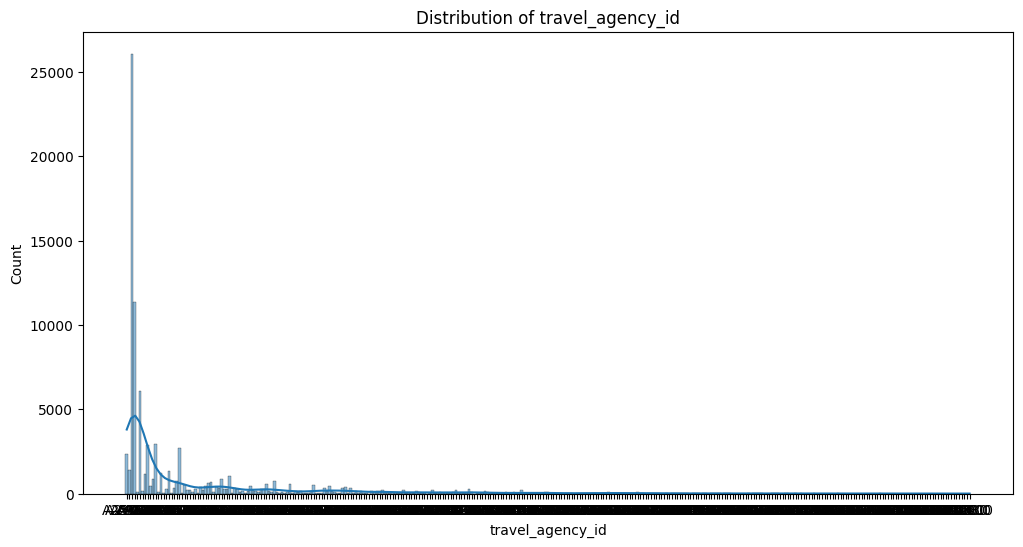

In [139]:
# Distribusi dari kolom 'travel_agency_id'
plt.figure(figsize=(12, 6))
sns.histplot(df_explore['travel_agency_id'], bins=30, kde=True)
plt.title('Distribution of travel_agency_id')
plt.show()

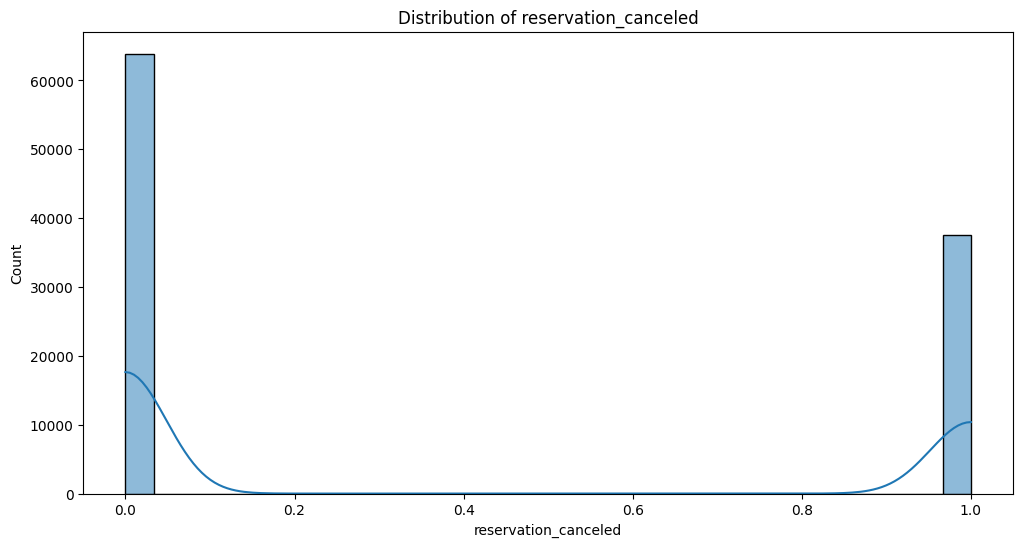

In [140]:
# Distribusi dari kolom 'reservation_canceled'
plt.figure(figsize=(12, 6))
sns.histplot(df_explore['reservation_canceled'], bins=30, kde=True)
plt.title('Distribution of reservation_canceled')
plt.show()

Dari disribbusi di atas, diketahui bahwa pada dataset tersebut total reservasi sukses jauh mendaominasi jumlah reservasi yang dibatalkan dengan total reservasi sukses melebih 50.000

Urutan seluruh agen yang diurutkan berdasarkan jumlah reservasi sukses:
    travel_agency_id  count
292             A9.0  15221
95            A240.0   6868
273             A7.0   2501
29             A14.0   2400
105           A250.0   1925
..               ...    ...
200           A406.0      1
198           A404.0      1
268            A64.0      1
115           A267.0      1
137           A304.0      1

[301 rows x 2 columns]
------------------------------------------------------------



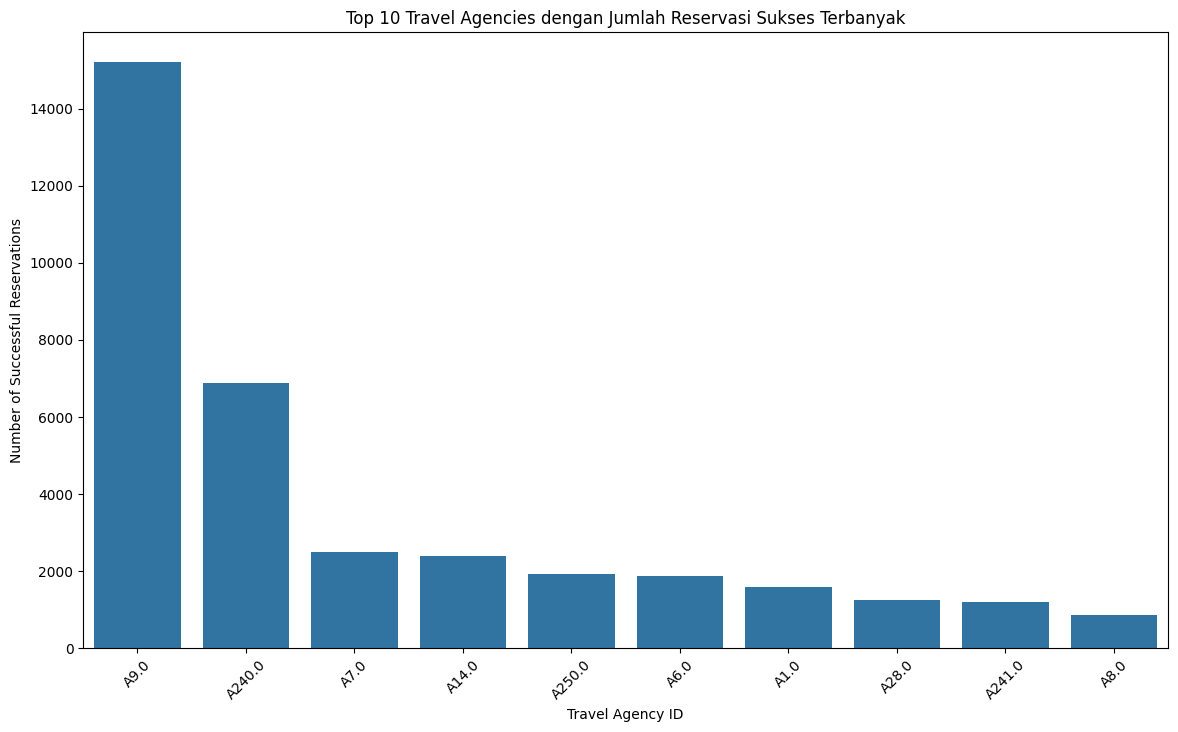

Kode agen dengan jumlah reservasi sukses terbanyak adalah

------------------------------------------------------------
    travel_agency_id  count
292             A9.0  15221
------------------------------------------------------------


In [144]:
# Mengelompokkan data berdasarkan 'travel_agency_id' dan menghitung jumlah reservasi sukses
successful_reservations = df_explore[df_explore['reservation_canceled'] == 0].groupby('travel_agency_id').size().reset_index(name='count')

# Mengurutkan seluruh agen berdasarkan jumlah reservasi sukses
sorted_agencies = successful_reservations.sort_values(by='count', ascending=False)

# Menampilkan seluruh agen yang diurutkan berdasarkan jumlah reservasi sukses
print("Urutan seluruh agen yang diurutkan berdasarkan jumlah reservasi sukses:")
print(sorted_agencies)
print("------------------------------------------------------------\n")


# Visualisasi distribusi top agency
plt.figure(figsize=(14, 8))
sns.barplot(data=sorted_agencies.head(10), x='travel_agency_id', y='count')
plt.title('Top 10 Travel Agencies dengan Jumlah Reservasi Sukses Terbanyak')
plt.xlabel('Travel Agency ID')
plt.ylabel('Number of Successful Reservations')
plt.xticks(rotation=45)
plt.show()

#Mendapatkan kode agent dengan jumlah reservasi sukses terbanyak (berada pada urutan 1)
top_agency = successful_reservations.sort_values(by='count', ascending=False).head(1)

print("Kode agen dengan jumlah reservasi sukses terbanyak adalah\n")
print("------------------------------------------------------------")
print(top_agency)
print("------------------------------------------------------------")




In [143]:
# Filter data untuk reservasi sukses
successful_reservations = df[df['reservation_canceled'] == 0]

# total reservasi A9.0
top_agency_reservations = sorted_agencies[sorted_agencies['travel_agency_id'] == 'A9.0']['count'].iloc[0]

# Hitung total reservasi sukses
total_successful_reservations = successful_reservations.shape[0]

# Menghitung persentase reservasi sukses dari top agency terhadap total reservasi sukses
percentage_of_top_agency_reservations = (top_agency_reservations / total_successful_reservations) * 100

print("\nPersentase total reservasi sukses dari top agency terhadap total seluruh reservasi sukses:", percentage_of_top_agency_reservations, "%")


Persentase total reservasi sukses dari top agency terhadap total seluruh reservasi sukses: 27.9002841169462 %


Dari visualisasi di atas diketahui bahwa kode agen A9.0 memiliki jumlah reservasi terbanyak. Setelah didapatkan count pada urutan pertama diketahui bahwa jumlah reservasi sukses pada kode agen A9.0 sendiri adalah sebanyak 14.114 kali. Angka ini berkontibusi sekitar 25.86% dari total keseluruhan reservasi sukses. Dari jumlah dan urutan di atas juga didapati bahwa Agen A9.0 mendominasi dengan jumlah reservasi sukses yang jauh lebih tinggi daripada agen lainnya. Setelah itu, terdapat penurunan yang signifikan dalam jumlah reservasi sukses yang smeakin menguatkandominasi agen A9.0 dalam pasar reservasi.

Adapun setalahnya disusul oleh kode agen unknown dengan jumlah reservasi sukses sebanyak 11.202. Nilai unknown menunjukkan bahwa ada sejumlah besar reservasi yang tidak bisa diidentifikasi dengan agen spesifik. Ini bisa berarti bahwa data pengisian tidak lengkap atau ada kesalahan dalam entri data.

--------------------------------------------------
## **EDA 2: Jenis Penginapan dengan Harga Termurah dan Termahal serta Hubungannya dengan Total Malam Dihabiskan Selama Hari Kerja**
--------------------------------------------------

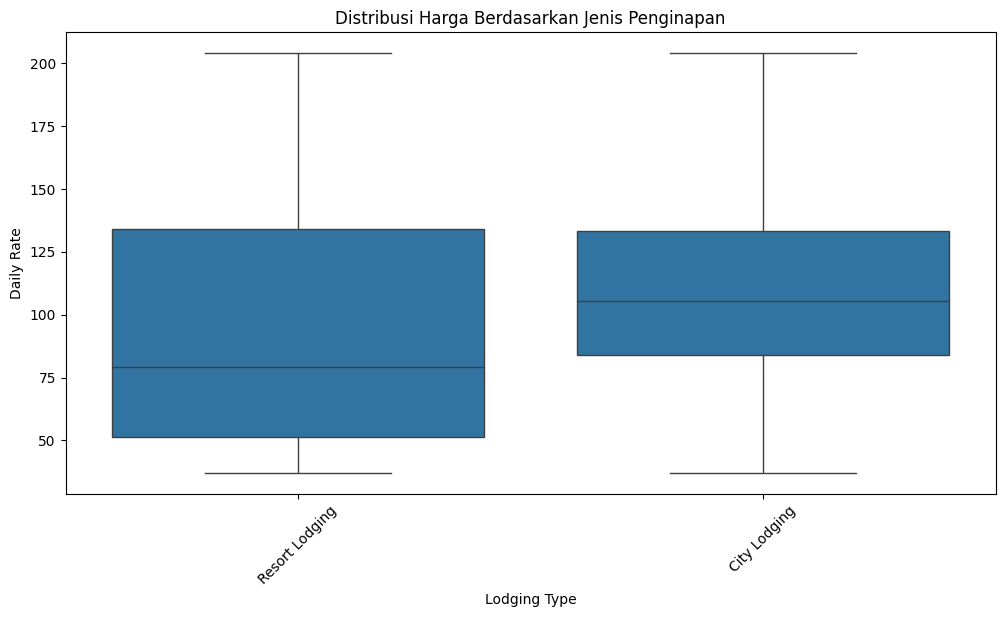

In [146]:
# Visualisasi distribusi harga (daily_rate) berdasarkan jenis penginapan (lodging_type)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='lodging_type', y='daily_rate')
plt.title('Distribusi Harga Berdasarkan Jenis Penginapan')
plt.xlabel('Lodging Type')
plt.ylabel('Daily Rate')
plt.xticks(rotation=45)
plt.show()

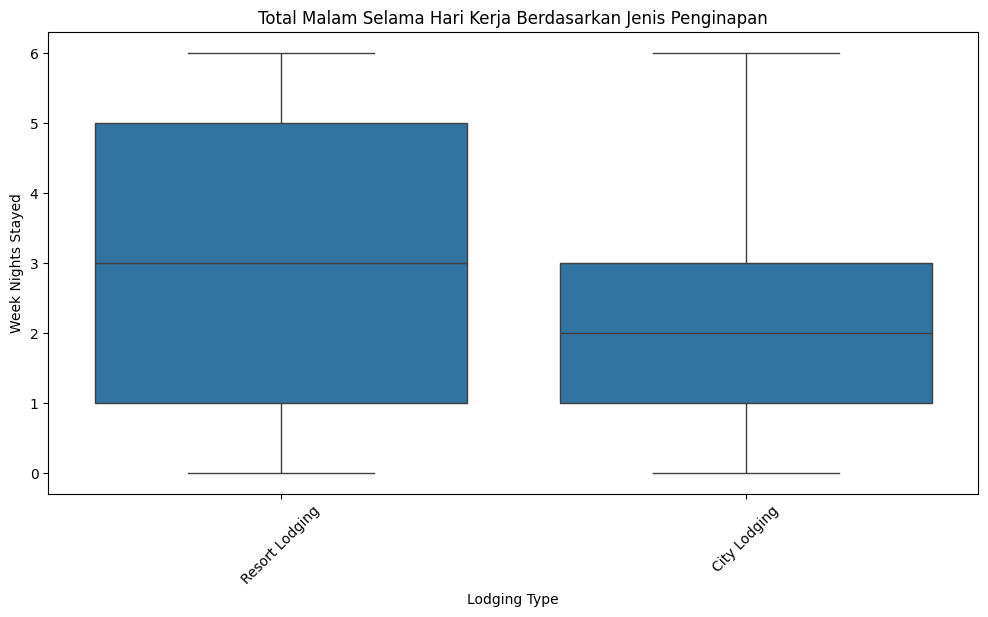

In [147]:
# Visualisasi hubungan antara lodging_type dan week_nights_stayed
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='lodging_type', y='week_nights_stayed')
plt.title('Total Malam Selama Hari Kerja Berdasarkan Jenis Penginapan')
plt.xlabel('Lodging Type')
plt.ylabel('Week Nights Stayed')
plt.xticks(rotation=45)
plt.show()

### Encoding

In [148]:
### Label encoding
from sklearn.preprocessing import LabelEncoder
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui setiap kolom dalam DataFrame
for column in df.columns:
    # Cek apakah tipe data kolom adalah objek (kategorikal)
    if df[column].dtype == 'object':
        # Lakukan Label Encoding
        df[column] = label_encoder.fit_transform(df[column])

### Korelasi Pearson

In [149]:
# Menghitung koefisien korelasi Pearson
correlation = df['lodging_type'].corr(df['week_nights_stayed'])
print("\nKoefisien Korelasi Pearson antara jenis penginapan dan total malam dihabiskan selama hari kerja:\n",correlation)


Koefisien Korelasi Pearson antara jenis penginapan dan total malam dihabiskan selama hari kerja:
 0.21842474659910985


In [150]:
# Menghitung koefisien korelasi Pearson
correlation = df['daily_rate'].corr(df['week_nights_stayed'])
print("\nKoefisien Korelasi Pearson antara jenis penginapan dan total malam dihabiskan selama hari kerja:\n",correlation)


Koefisien Korelasi Pearson antara jenis penginapan dan total malam dihabiskan selama hari kerja:
 0.07803587420051354


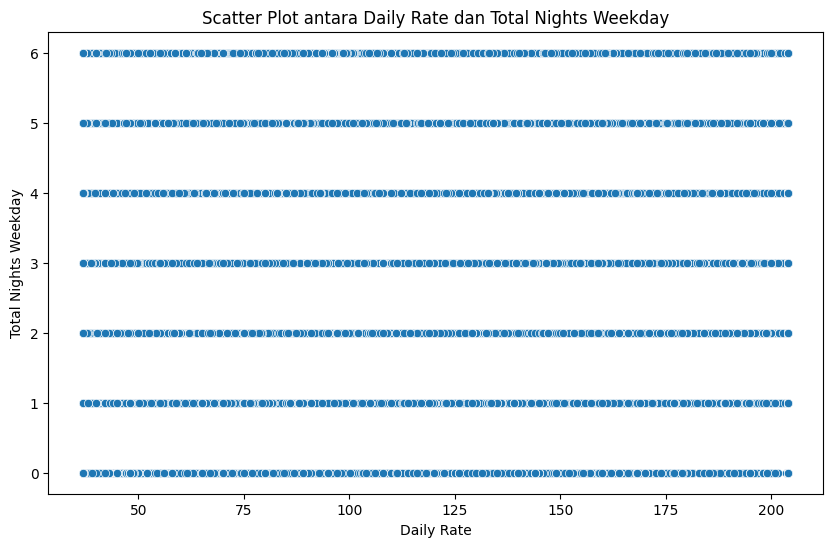

In [151]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daily_rate', y='week_nights_stayed', data=df)
plt.title('Scatter Plot antara Daily Rate dan Total Nights Weekday')
plt.xlabel('Daily Rate')
plt.ylabel('Total Nights Weekday')
plt.show()

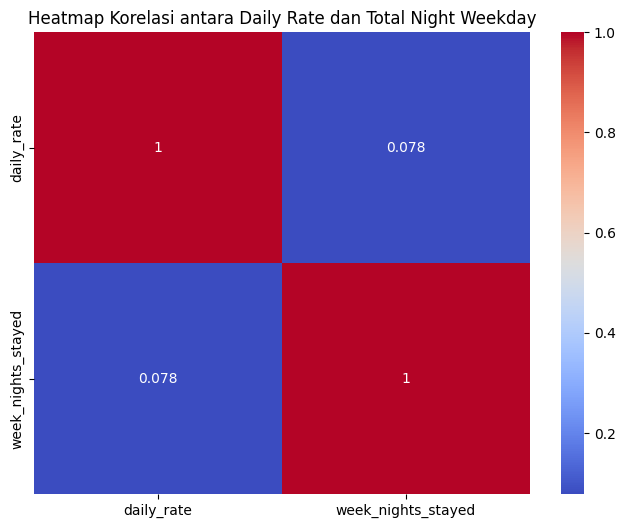

In [152]:
# Membuat heatmap korelasi
correlation_matrix = df[['daily_rate', 'week_nights_stayed']].corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Heatmap Korelasi antara Daily Rate dan Total Night Weekday')
plt.show()

### Penjelasan

Dari Boxplot Distribusi Harga Berdasarkan Jenis Penginapan diketahui bahwa jenis penginapan city lodging memiliki range harga yang lebih tinggi daripada resort loding. Hal ini bisa saja dikarenakan city lodging yang terletak di pusat kota atau daerah perkotaan yang biasanya berada di tengah-tengah aktivitas perkotaan, seperti pusat perbelanjaan, kantor, restoran, dan atraksi wisata kota. Tentu saja secara biaya di daerah tengah perkotaan juga lebih mahal yang juga mengakibatkan harga penginapannya yang ikut mahal. Sedangkan resrto loding terletak di resor atau area liburan yang biasanya di tempat-tempat alami yang indah, seperti pantai, pegunungan, atau daerah pedesaan yang tenang. Maka dari itu, hal tersebut mengakibatkan rentang harganya yang lebih bervariasi dan banyak yang lebih murah daripada city lodging.

Adapun antara harga sewa (daily_rate) dan (week_nights_stayed) total malam yang dihabiskan selama hari kerja memiliki koefisien korelasi Pearson sebesar 0.09129619724399528
. Ini menunjukkan adanya korelasi positif yang sangat lemah bahkan hampir tidak ada antara harg sewa dan jumlah malam yang dihabiskan selama hari kerja. Artinya, ada sangat sedikit kecenderungan bahwa semakin murah harga sewa maka semakin meningikat total malam yang lebih lama selama hari kerja, tetapi korelasinya tidak terlalu kuat. Meskipun begitu, dari Boxplot Distribusi otal Malam Selama Hari Kerja Berdasarkan Jenis Penginapan diketahui bahwa orang-orang yang menginap di resort lodging dengan harga yang lebih murah cenderung mengahbiskan malam yang lebih lama daripada orang-orang yang menginap di city lodging. 

--------------------------------------------------
## **Klasifikasi dengan Decission Tree**
--------------------------------------------------

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

copy_of_df = df.copy()

# X adalah fitur-fitur dan y adalah target
X = copy_of_df.drop(columns=['reservation_canceled'], axis=1)
y = copy_of_df['reservation_canceled']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Melatih model pada data latih
clf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

# Laporan klasifikasi
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi model: 0.7527582081616376
Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     10961
           1       0.54      0.57      0.55      4085

    accuracy                           0.75     15046
   macro avg       0.69      0.69      0.69     15046
weighted avg       0.76      0.75      0.75     15046



--------------------------------------------------
## **Regresi dengan Ridge**
--------------------------------------------------

In [154]:
copy_of_df = df.copy()

#  Memisahkan fitur dan target
X = copy_of_df.drop('daily_rate', axis=1)
y = copy_of_df['daily_rate']

# Pembagian data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model regresi Ridge
ridge_reg = Ridge(alpha=1.0) 
ridge_reg.fit(X_train_scaled, y_train)

# Memprediksi harga reservasi pada set pengujian
y_pred = ridge_reg.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1376.5031159218859
R-squared: 0.33161318830983966
